In [224]:
import seaborn as sns
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots


##  Seaborn `tips` Dataset Overview

###  Dataset Background

* **Context**: Represents tipping behavior at a restaurant in the U.S.

### Column Descriptions

| **Column**   | **Type**            | **Description**                                                         |
| ------------ | ------------------- | ----------------------------------------------------------------------- |
| `total_bill` | `float`             | Total amount of the bill (in USD), including food and drinks.           |
| `tip`        | `float`             | Tip amount (in USD) given to the server.                                |
| `sex`        | `category (string)` | Gender of the person paying the bill (`Male` or `Female`).              |
| `smoker`     | `category (string)` | Whether the party included smokers (`Yes` or `No`).                     |
| `day`        | `category (string)` | Day of the week when the meal was served (`Thur`, `Fri`, `Sat`, `Sun`). |
| `time`       | `category (string)` | Time of day of the meal (`Lunch` or `Dinner`).                          |
| `size`       | `int`               | Number of people in the dining party.                                   |

---




####  Typical Questions Explored:

* Do men or women tip more?
* Are tips higher during lunch or dinner?
* Does smoking status influence tipping?
* Is there a relationship between bill size and tip amount?
* How does party size affect the tip?

And many more question answered.

In [225]:
tip_df = sns.load_dataset('tips')

In [226]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [227]:
print(tip_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


**Tips Dataset Overview**

- **Rows:** 244  
- **Columns:** 7  
- **No missing values**

In [228]:
# let's get the quick statistical overview of the dataframe
tip_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000



**Key Statistics:**
- **Average total bill:** \$19.78 &nbsp;|&nbsp; **Maximum bill:** \$50.81
- **Average tip:** \$2.99 &nbsp;|&nbsp; **Maximum tip:** \$10.00
- **Typical party size:** 2–3 people &nbsp;|&nbsp; **Maximum party size:** 6

**Columns:**
- `total_bill`, `tip`, `sex`, `smoker`, `day`, `time`, `size`

In [229]:
print(tip_df.describe(exclude='number'))

         sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176


**Categorical Variable Summary**

- **Sex:** Majority are Male (157 out of 244)
- **Smoker:** Most are Non-smokers (151 out of 244)
- **Day:** Most visits occur on Saturday (87 out of 244)
- **Time:** Dinner is the most common meal time (176 out of 244)

These statistics indicate that the dataset is dominated by male, non-smoking customers dining at dinner, especially on Saturdays.


In [230]:
tip_df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [231]:
# Bar plot
bar_plot = alt.Chart(tip_df).mark_bar(color='#4C78A8', opacity=0.85).encode(
    x=alt.X('total_bill', bin=alt.Bin(maxbins=30), title='Total Bill (USD)'),
    y=alt.Y('count()', title='Number of Bills'),
    tooltip=[alt.Tooltip('count()', title='Count')]
).properties(
    height=400, width=400, title=''
)

# Box plot
box_plot = alt.Chart(tip_df).mark_boxplot(size=60, color='#F58518').encode(
    x=alt.X('total_bill', title='Total Bill (USD)'),
    tooltip=[alt.Tooltip('total_bill', title='Total Bill')]
).properties(
    height=400, width=400, title=''
)

# Titles for full visualization
titles = alt.TitleParams(
    text='Distribution of Total Bills: Most parties spend moderately.',
    fontSize=20,
    align='center',
    anchor='middle',
    subtitle=[
        "Most bills are between $10–$20, median ≈ $18;",
        "A few outliers above $40"
    ]
)

# Concatenate and apply configuration to the combined chart
combined_chart = (box_plot | bar_plot ).properties(title= titles).configure_view(strokeWidth=0)


combined_chart


alt.HConcatChart(...)

What's the tiping behaviour? 

In [232]:
# Bar plot
bar_plot = alt.Chart(tip_df).mark_bar(color='#4C78A8', opacity=0.85).encode(
    x=alt.X('tip', bin=alt.Bin(maxbins=30), title='Tip (USD)'),
    y=alt.Y('count()', title='Number of Bills'),
    tooltip=[alt.Tooltip('count()', title='Count')]
).properties(
    height=400, width=400, title=''
)

# Box plot
box_plot = alt.Chart(tip_df).mark_boxplot(size=60, color='#F58518').encode(
    x=alt.X('tip', title='Tip (USD)'),
    tooltip=[alt.Tooltip('tip', title='Tip')]
).properties(
    height=400, width=400, title=''
)



# Titles for full visualization
titles = alt.TitleParams(
    text='Tip Amounts: Most tips are small, with a few large exceptions.',
    fontSize=20,
    align='center',
    anchor='middle',
    subtitle=[
        "Most tips are between $2–$3.50, median ≈ $2.90;",
        "A few outliers above $7, max = $10"
    ]
)

# Concatenate and apply configuration to the combined chart
combined_chart = (box_plot | bar_plot ).properties(title= titles).configure_view(strokeWidth=0)


combined_chart


alt.HConcatChart(...)

Now let's visualise how the data is distributed accross different categorical columns

In [233]:
# Create individual charts for each categorical column
cat_charts = [
    alt.Chart(tip_df)
    .mark_bar(color='#4C78A8', opacity=0.85)
    .encode(
        x=alt.X('count()', title='Number of Records', axis=alt.Axis(labelFontSize=12, titleFontSize=14)),
        y=alt.Y(f'{col}:N', title=col.capitalize(), axis=alt.Axis(labelFontSize=12, titleFontSize=14)),
        tooltip=[alt.Tooltip('count()', title='Count'), alt.Tooltip(f'{col}:N', title=col.capitalize())]
    )
    .properties(
        width=350,
        height=80,
        title=alt.TitleParams(
            text=f'Distribution of {col.capitalize()}',
            fontSize=16,
            anchor='start'
        )
    )
    for col in cat_column
]

# Arrange in 1, 2, 2 format
category_chart = alt.vconcat(
    cat_charts[0],
    alt.hconcat(cat_charts[1], cat_charts[2]).properties(spacing=50),
    alt.hconcat(cat_charts[3], cat_charts[4]).properties(spacing=50)
).properties(
    padding=20,
    spacing=50,
    title=alt.TitleParams(
        text='Distribution of Categorical Variables in Tips Dataset',
        fontSize=20,
        subtitle=['Counts for each category in: sex, smoker, day, time, and party size'],
        anchor='end',
        dy=10
    )
).configure_axis(
    grid=True,
    gridColor='lightgray',
    gridOpacity=0.3,
    labelFont='Arial',
    titleFont='Arial'
).configure_view(
    stroke=None
).configure_title(
    fontSize=20,
    font='Arial',
    anchor='start',
    color='#333'
)

category_chart


alt.VConcatChart(...)

### Conclusion from the above plot

- **Gender Distribution:** Males constitute the majority, with 157 out of 244 records.
- **Smoking Status:** Non-smokers are more prevalent (151 out of 244).
- **Day of Visit:** Customer visits peak during the weekend (Saturday and Sunday) compared to weekdays.
- **Time of Visit:** Dinner is the preferred meal time, with 176 out of 244 visits occurring at dinner.
- **Party Size:** Most dining parties consist of two people, suggesting that couples may be the most common group, although the dataset does not explicitly confirm this.


### Who Are the Majority of Smokers? Are They Males or Females?

To understand the gender distribution among smokers in the dataset,<br>
 we examine the intersection of the `sex` and `smoker` columns.



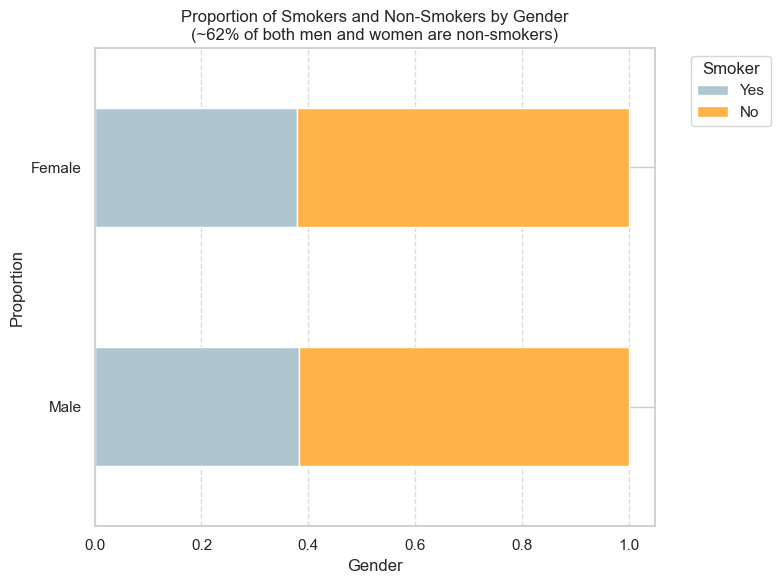

In [234]:

# Normalized crosstab
gender_smoker_props = pd.crosstab(tip_df['sex'], tip_df['smoker'], normalize='index')

# Create plot
ax = gender_smoker_props.plot(
    kind='barh',
    stacked=True,
    color=['#AEC6CF', '#FFB347'],
    figsize=(8, 6)
)

# Title and labels
plt.title('Proportion of Smokers and Non-Smokers by Gender\n(~62% of both men and women are non-smokers)')
plt.xlabel('Gender')
plt.ylabel('Proportion')

# Add grid on y-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Place legend outside the plot
plt.legend(title='Smoker', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Findings:**

Approximately 62% of both men and women in the dataset are non-smokers. This indicates that non-smoking is the majority status across both genders, with a similar proportion for males and females.

**Question:**  
**Who pays more tip, men or women?**  
*Are tipping patterns different for men and women?*




In [235]:

# Create the box plot
fig_sex_tip = px.box(
    data_frame=tip_df,
    x='sex',
    y='tip',
    color='sex',
    title='',
    labels={'sex': 'Gender', 'tip': 'Tip Amount (USD)'},
    template='plotly_white'
)

# Add black outline to boxes
fig_sex_tip.update_traces(marker=dict(line=dict(width=2, color='black')))

# Update layout with main title and subtitle
fig_sex_tip.update_layout(
    xaxis=dict(
        title='Gender',
        tickfont=dict(size=14),
        title_standoff=40,     # Adds spacing between axis title and tick labels
        tickangle=0,           # Keep labels horizontal
        categoryorder='category ascending',
    ),
    title={
        'text': 'Men Tend to Tip More Than Women<br><sup>Box plot to show tipping patterns based on gender</sup>',
        'x': 0.5,
        'xanchor': 'center'
    },
    title_font=dict(size=20, family='Arial'),
    font=dict(size=14, family='Arial'),
    legend_title='Gender',
    width=600,
    height=450,
    margin=dict(l=40, r=40, t=100, b=40),
    
)

# Display the plot
fig_sex_tip.show()


- **Findings:**  
    - **Men** tend to tip slightly more than **women** on average.
    - The maximum tip given by men is higher (\$10.00) compared to women (\$6.50).
    - Male customers show more high-value outliers (tips above \$6), while female tips have only one notable outlier at \$6.50.
    - Typical tipping patterns are similar, but men are more likely to leave exceptionally large tips.

- **Conclusion:**  
    While both genders have similar median tipping behavior, men are more likely to leave higher and more variable tips than women.

###  How are the `total_bill` and `tip` related by gender?

- **Does a larger bill result in a larger tip?**


In [236]:
fig = px.scatter(
    tip_df,
    x='total_bill',
    y='tip',
    color='sex',
    labels={
        'total_bill': 'Total Bill (USD)',
        'tip': 'Tip Amount (USD)',
        'sex': 'Gender'
    },
    
    template='plotly_white',
    width=800,
    height=500
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='black')))
fig.update_layout(
     title={
        'text': (
            'Tip Amount Rises with Total Bill<br>'
            '<sup>Men generally have higher bills and leave larger tips than women.</sup>'
        ),
        'x': 0.5,
        'xanchor': 'center'
    },
    title_font=dict(size=22, family='Arial'),
    font=dict(size=15, family='Arial'),
    legend_title='Gender',
    margin=dict(l=50, r=50, t=80, b=50),
    xaxis=dict(title_font=dict(size=18), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=18), tickfont=dict(size=14))
)

fig.show()


**Key Findings:**

- There is a clear, positive (approximately linear) relationship between the total bill amount and the tip: as the bill increases, the tip amount tends to increase as well.
- Male customers generally have higher total bills and leave larger tips compared to female customers.

In [237]:
fig = px.histogram(
    tip_df,
    x="tip",
    facet_col="sex",
    color="sex",
    nbins=30,
    opacity=0.85,
    labels={"tip": "Tip Amount (USD)", "sex": "Gender"},
    template="plotly_white"
)

fig.update_traces(marker_line_width=1.5, marker_line_color="black")

fig.update_layout(
    title={
        "text": (
            "Distribution of Tip Amounts by Gender<br>"
            "<sup>Most tips are between $2–$3.50 for both men and women; "
            "men show more high-value outliers (up to $10)</sup>"
        ),
        "x": 0.5,
        "xanchor": "center"
    },
    font=dict(size=15, family="Arial"),
    bargap=0.1,
    showlegend=False,
    margin=dict(t=150, l=40, r=40, b=50)
)

# Remove x-axis title from the right facet
fig.update_xaxes(title_text="", row=1, col=2)
# Keep x-axis title only on the left facet
fig.update_xaxes(title_text="Tip Amount (USD)", row=1, col=1)

fig.for_each_annotation(lambda a: a.update(text=a.text.replace("sex=", "")))
fig.show()

###  Does Smoking Status Influence Spending and Tipping?

- **How does being a smoker or non-smoker impact the total bill and tip amounts?**
- **Do smokers tend to have higher bills and leave larger tips compared to non-smokers?**

In [238]:


# Create a subplot figure with 1 row and 3 columns
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Total Bill by Smoking Status", "Tip Amount by Smoking Status", "Tip vs. Total Bill"),
    column_widths=[0.3, 0.3, 0.4],
    shared_yaxes=False
)

# Box plot: Total bill by smoking status
box1 = px.box(tip_df, x='smoker', y='total_bill', color='smoker')
for trace in box1.data:
    fig.add_trace(trace, row=1, col=1)

# Box plot: Tip amount by smoking status
box2 = px.box(tip_df, x='smoker', y='tip', color='smoker')
for trace in box2.data:
    fig.add_trace(trace, row=1, col=2)

# Scatter plot with trendline: Tip vs. Total Bill by smoking status
scatter = px.scatter(
    tip_df,
    x='total_bill',
    y='tip',
    color='smoker',
    labels={'smoker': 'Smoking Status', 'total_bill': 'Total Bill (USD)', 'tip': 'Tip Amount (USD)'}
)
scatter.update_layout(
    xaxis_title='Total Bill (USD)',
    yaxis_title='Tip Amount (USD)'
)
for trace in scatter.data:
    fig.add_trace(trace, row=1, col=3)

# Update layout
fig.update_layout(
    title={
        'text': (
            'Smoking Status Influences Spending and Tipping Behavior<br>'
            '<sup>Smokers show higher bills and tips on average, but differences are modest with overlapping distributions.</sup>'
        ),
        'x': 0.5,
        'xanchor': 'center'
    },
    template='plotly_white',
    height=500,
    width=1200,
    margin=dict(t=200),
    font=dict(size=14),
    showlegend=False,
    
)

fig.show()


**Findings:**

- **Smokers** tend to have higher total bill amounts and also leave higher tips compared to non-smokers.
- The box plots show that both the median and the spread for total bill and tip are greater for smokers.
- The scatter plot confirms that, for similar bill amounts, smokers often tip more than non-smokers.
- However, the difference is not extreme—there is considerable overlap between the two groups.

>## **Question:**  
> **How does the distribution of meal times (lunch vs. dinner) vary across different days of the week?**  


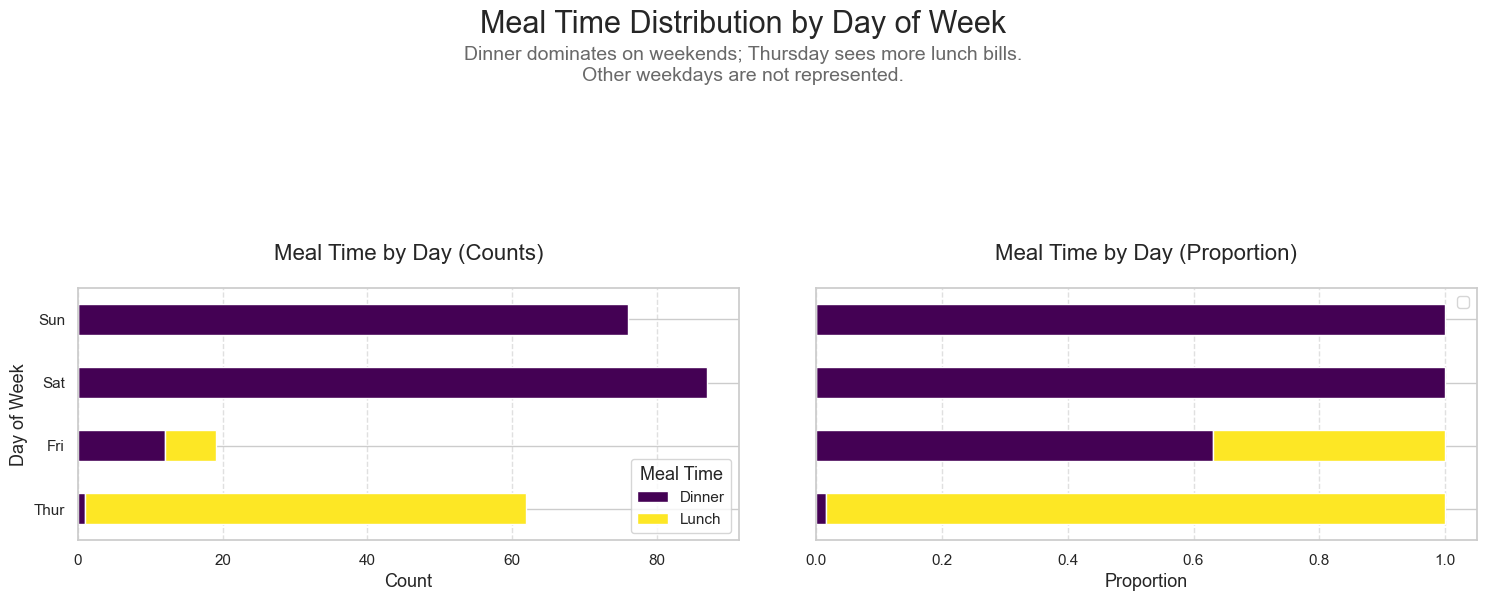

In [239]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Actual counts plot
actual_crosstab.plot(
    kind="barh",
    stacked=True,
    ax=axes[0],
    colormap="viridis"
)
axes[0].set_title("Meal Time by Day (Counts)", fontsize=16, fontname="Arial", pad=20)
axes[0].set_xlabel("Count", fontsize=13, fontname="Arial")
axes[0].set_ylabel("Day of Week", fontsize=13, fontname="Arial")
axes[0].legend(title="Meal Time", fontsize=11, title_fontsize=13, loc='lower right')
axes[0].grid(axis='x', linestyle='--', color='lightgray', alpha=0.7)

# Normalized plot
normalized_crosstab.plot(
    kind="barh",
    stacked=True,
    ax=axes[1],
    colormap="viridis"
)
axes[1].set_title("Meal Time by Day (Proportion)", fontsize=16, fontname="Arial", pad=20)
axes[1].set_xlabel("Proportion", fontsize=13, fontname="Arial")
axes[1].set_ylabel("")
axes[1].legend('')
axes[1].grid(axis='x', linestyle='--', color='lightgray', alpha=0.7)

# Add a main title and subtitle
fig.suptitle(
    "Meal Time Distribution by Day of Week",
    fontsize=22, fontname="Arial", y=1.08
)
fig.text(
    0.5, 1.02,
    "Dinner dominates on weekends; Thursday sees more lunch bills.\nOther weekdays are not represented.",
    ha='center', va='top', fontsize=14, fontname="Arial", color='dimgray'
)

plt.tight_layout(pad=4, rect=[0, 0, 1, 0.96])
plt.show()


**Findings:**

- On weekends (Saturday and Sunday) and Friday, the majority of billing occurs during dinner time.
- On Thursday, most billing takes place at lunch.
- The absence of data for other weekdays limits our ability to draw broader conclusions about weekday dining patterns.
- This pattern may reflect typical restaurant behavior, where weekend evenings are busier, while weekday lunches (such as Thursday) see more activity, possibly due to work-related gatherings or lunch breaks.

## How does the party size affected the `total bill` and `tips`?

In [240]:
tips = tip_df.copy()
tips['size'] = tips['size'].astype(str)
tips = tips.sort_values('size')

fig2 = px.box(
    tips,
    x="size",
    y="tip",
    labels={"size": "Party Size", "tip": "Tip Amount ($)"},
    template="plotly_white"
)

fig2.update_traces(marker=dict(line=dict(width=2, color='black')))

fig2.update_layout(
    title={
        'text': (
            "Tip Amount Distribution by Party Size<br>"
            "<sup>Larger parties tend to leave higher tips, but variability increases with size</sup>"
        ),
        'x': 0.5,
        'xanchor': 'center'
    },
    title_font=dict(size=22, family='Arial'),
    font=dict(size=14, family='Arial'),
    xaxis=dict(
        title='Party Size',
        tickfont=dict(size=13),
        title_font=dict(size=16)
    ),
    yaxis=dict(
        title='Tip Amount ($)',
        tickfont=dict(size=13),
        title_font=dict(size=16)
    ),
    width=700,
    height=450,
    margin=dict(l=50, r=50, t=100, b=50)
)

fig2.show()


**Findings:**  
- The average tip amount generally increases as the party size increases, though there is some fluctuation due to the presence of outliers.
- Larger parties tend to leave higher tips, but the variability in tip amounts also grows with party size.
- This trend aligns with the observation that total bill amounts also rise with party size, as seen in previous plots.




----

### **Summary of Tipping Behavior in the Seaborn `tips` Dataset**

The `tips` dataset offers a comprehensive look at restaurant tipping habits in the U.S., with 244 complete records. It captures total bill, tip, gender, smoking status, day, time, and party size.

- **Customer Demographics:**  
    - Most customers are male (157/244) and non-smokers (151/244).
    - The majority of visits are for dinner (176/244), especially on weekends (Saturday and Sunday).
    - Typical party size is 2–3 people.

- **Spending and Tipping Patterns:**  
    - Average total bill: \$19.78 (max \$50.81); most bills are \$10–\$20.
    - Average tip: \$2.99 (max \$10.00); most tips are \$2–\$3.50.
    - Tips increase with total bill, and a few high-value outliers exist, especially among men.

- **Gender Differences in Tipping:**  
    - Men tip slightly more than women on average (\$3.00 vs. \$2.75).
    - Men are more likely to leave large tips (max \$10.00 vs. \$6.50 for women).
    - Male tipping shows greater variability and more high-value outliers.

- **Other Influences:**  
    - **Smokers** tend to have higher bills and tips, but the difference is modest and distributions overlap.
    - **Meal time:** Dinner dominates on weekends; Thursday has more lunch bills.
    - **Party size:** Larger parties leave higher and more variable tips, reflecting higher total bills.
---

**Conclusion:**  
Tipping is moderately generous, with men tending to leave higher and more variable tips. The dataset is skewed toward male, non-smoking, dinner-time customers, and most parties are small. Outliers in tipping are more frequent among male patrons.